In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

pd.options.display.max_colwidth = 1000

In [3]:
def get_top_bag_of_words(data, word_count=3, top_count=10):
    word_vectorizer = CountVectorizer(ngram_range=(word_count,word_count), analyzer='word')
    sparse_matrix = word_vectorizer.fit_transform(data['cleaned_hm'])
    tfidf_transformer = TfidfTransformer()
    sparse_matrix_new = tfidf_transformer.fit_transform(sparse_matrix)
    frequencies = sum(sparse_matrix_new).toarray()[0]
    bag_of_words = pd.DataFrame({'bag_of_words': word_vectorizer.get_feature_names(), 'frequency': frequencies})
    bag_of_words = bag_of_words.sort_values('frequency', ascending=False)
    top_10_bag_of_words = bag_of_words.head(top_count)
    return top_10_bag_of_words

# Qualitative analysis

In [4]:
data = pd.read_csv("data/mergedData2.csv")

In [5]:
data.columns

Index(['wid', 'hmid', 'reflection_period', 'original_hm', 'cleaned_hm',
       'modified', 'num_sentence', 'ground_truth_category',
       'predicted_category', 'age', 'country', 'gender', 'marital',
       'parenthood'],
      dtype='object')

### Dimensions of dataset

Features: age group, country, gender, marital status, parenthood, reflection period


Outcome: predicted category, unigram, bigram

### case study 1

In [6]:
data_group_1_married = data[(data["country"] == "USA") & (data["marital"] == "married") & (data["reflection_period"] == "24h") & (data["ground_truth_category"] == "enjoy_the_moment")]
data_group_1_single = data[(data["country"] == "USA") & (data["marital"] == "single") & (data["reflection_period"] == "24h") & (data["ground_truth_category"] == "enjoy_the_moment")]

In [7]:
print("Size of married group:", data_group_1_married.shape[0])
print("Size of singles group:", data_group_1_single.shape[0])

Size of married group: 220
Size of singles group: 402


In [8]:
words = get_top_bag_of_words(data_group_1_married)
words

,bag_of_words,frequency
200,ate great steak,3.000000
1171,made me happy,2.633241
2225,was able to,2.206902
995,in the mail,1.824660
439,cup of coffee,1.586881
16,able to sleep,1.470806
1186,makes me happy,1.437323
2099,to sleep in,1.384523
1050,it made me,1.270481
1420,of my favorite,1.211197


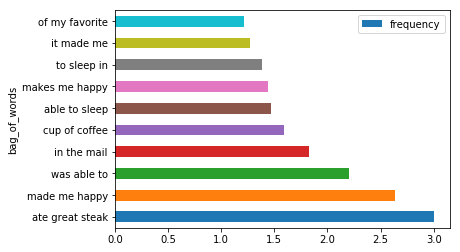

In [9]:
words.plot(x='bag_of_words', y='frequency', kind='barh')

In [10]:
data_group_1_married[data_group_1_married['cleaned_hm'].str.contains('steak')].sample(5)['cleaned_hm']

4435                                                         ate a great steak
71942                                                    I had a steak dinner.
4425                                                         ate a great steak
50042    The delicious steak that I had for dinner tonight made me very happy.
97141              I ate a steak, green beans, and corn on the cob for supper.
Name: cleaned_hm, dtype: object

In [11]:
words = get_top_bag_of_words(data_group_1_single)
words

,bag_of_words,frequency
2083,made me happy,7.034609
3278,that made me,3.805972
2525,of my favorite,3.080874
2747,pizza for dinner,2.301248
1045,event that made,2.285059
3924,was happy when,2.195667
3889,was able to,2.083371
2624,one of my,2.031187
1886,it made me,1.917016
2148,me happy in,1.891122


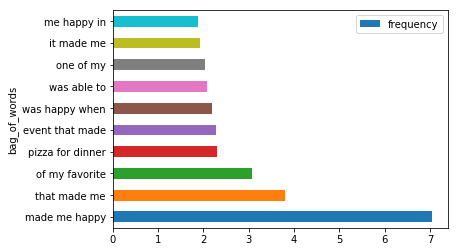

In [12]:
words.plot(x='bag_of_words', y='frequency', kind='barh')

In [13]:
data_group_1_single[data_group_1_single['cleaned_hm'].str.contains('pizza')].sample(5)['cleaned_hm']

57543                                               I had ice cream and pizza for dinner.
53501                                             Eating a BBQ pizza from Little Ceasars.
68793    I ordered two of my favorite pizzas from Pizza Hut and it was cooked just right.
22992                   I made myself pizza for dinner and sampled some home brewed beer.
43932                                                        Eating pizza made me happy. 
Name: cleaned_hm, dtype: object

### case study 2

In [14]:
data_group_1_a = data[(data["country"] == "USA") & (data["parenthood"] == "y") & (data["reflection_period"] == "24h") & (data["ground_truth_category"] == "enjoy_the_moment")]
data_group_1_b = data[(data["country"] == "USA") & (data["parenthood"] == "n") & (data["reflection_period"] == "24h") & (data["ground_truth_category"] == "enjoy_the_moment")]

In [15]:
print("Size of married group:", data_group_1_a.shape[0])
print("Size of singles group:", data_group_1_b.shape[0])

Size of married group: 210
Size of singles group: 447


In [16]:
words = get_top_bag_of_words(data_group_1_a, word_count=3)
words

,bag_of_words,frequency
1205,made me happy,2.679166
843,had steak dinner,2.000000
2285,was able to,1.949464
450,cup of coffee,1.947133
1083,it made me,1.718712
14,able to sleep,1.626091
2163,to sleep in,1.545140
1217,makes me happy,1.436554
1540,out of work,1.154701
783,got out of,1.154701


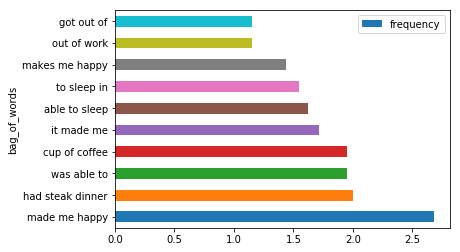

In [17]:
words.plot(x='bag_of_words', y='frequency', kind='barh')

In [18]:
data_group_1_a[data_group_1_a['cleaned_hm'].str.contains('sleep')].sample(5)['cleaned_hm']

47856                                                                                                                                         Being in bed earlier than usual and getting to watch Shameless before I fell asleep.  
57742                                                                                                                                    I got a full night of sleep. That does not often happen with a 3 month-old in the house. \n
427                                                                                                                                                             I got to sleep in this morning and it made me feel rested and happy.
33852                                                                                                                                                                     It was Saturday morning so I got to sleep in a little bit!
87203    1. My house was hit by a pickup truck. The truck came through my bedroom bu

In [19]:
data_group_1_a[data_group_1_a['cleaned_hm'].str.contains('made me happy')].sample(5)['cleaned_hm']

18940                                       A woman came into our Bible study.  She was from Iran but has become a Christian and abandoned being a Muslim.  It made me happy to hear her testimony.
98312    I'm going through a rough time in my life now, I was surfing youtube and found a lady reading tarot cards for Pisces(my sign), her voice and her outlook was positive so it made me happy.
13463                                                                                                                  An event that made me happy in the past 24 hours is getting free breakfast. 
40359                                                                                                                                        Not getting bills in the mail made me happy yesterday.
94086                                                                                         An event that made me happy in the past 24 hours was petting my cats after feeding them this morning.
Name: cleaned_hm, dt

In [20]:
words = get_top_bag_of_words(data_group_1_b, word_count=3)
words

,bag_of_words,frequency
2217,made me happy,7.358945
3490,that made me,3.569785
2686,of my favorite,3.541635
421,ate great steak,3.000000
1913,in the mail,2.400913
4143,was able to,2.377118
2795,one of my,2.310606
2924,pizza for dinner,2.307012
4179,was happy when,2.101572
1225,finished good book,2.000000


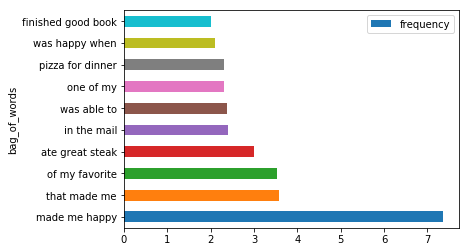

In [21]:
words.plot(x='bag_of_words', y='frequency', kind='barh')

In [22]:
data_group_1_b[data_group_1_b['cleaned_hm'].str.contains('made me happy')].sample(5)['cleaned_hm']

81003                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Another thing that made me happy is I received tickets in the mail for a music festival that I'm attending in a couple weeks.
46514                                                                                                                                                                                                                                                                                                                                                                         

# case study 3

In [23]:
data_group_1_a = data[(data["country"] == "USA") & (data["marital"] == "single") & (data["reflection_period"] == "3m") & (data["ground_truth_category"] == "leisure")]
data_group_1_b = data[(data["country"] == "IND") & (data["marital"] == "single") & (data["reflection_period"] == "3m") & (data["ground_truth_category"] == "leisure")]

In [24]:
print("Size of group a:", data_group_1_a.shape[0])
print("Size of group b:", data_group_1_b.shape[0])

Size of group a: 206
Size of group b: 47


In [25]:
words = get_top_bag_of_words(data_group_1_a, top_count=20)
words

,bag_of_words,frequency
1878,went to the,3.943280
1639,to the beach,3.009478
1208,read good book,2.000000
1046,of my favorite,1.548554
1163,played video game,1.287165
1099,one of my,1.265364
1270,saw movie at,1.154701
139,at the theater,1.154701
912,movie at the,1.154701
617,got to sleep,1.134177


In [26]:
words = get_top_bag_of_words(data_group_1_b, top_count=20)
words

,bag_of_words,frequency
141,went to movie,9.000000
144,went to temple,8.000000
143,went to shopping,6.739593
123,to shopping mall,5.151336
136,went for trip,2.300672
132,want to temple,1.000000
140,went to drama,1.000000
115,to browsing center,0.707107
138,went to browsing,0.707107
78,night at home,0.577350
